In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime

# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\weather_data.csv")
df

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.416877,37.705024,3.819833,16.538119
999996,San Antonio,2024-01-20 15:59:48,6.759080,40.731036,8.182785,29.005558
999997,New York,2024-04-14 08:30:09,15.664465,62.201884,3.987558,0.403909
999998,Chicago,2024-05-12 20:10:43,18.999994,63.703245,4.294325,6.326036


In [14]:
# Round data to 2 decimal place where necessary
df['Temperature_C'] = df['Temperature_C'].round(2)
df['Humidity_pct'] = df['Humidity_pct'].round(2)
df['Precipitation_mm'] = df['Precipitation_mm'].round(2)
df['Wind_Speed_kmh'] = df['Wind_Speed_kmh'].round(2)
df

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.68,41.20,4.02,8.23
1,San Diego,2024-05-17 15:22:10,8.73,58.32,9.11,27.72
2,San Diego,2024-05-11 09:30:59,11.63,38.82,4.61,28.73
3,Philadelphia,2024-02-26 17:32:39,-8.63,54.07,3.18,26.37
4,San Antonio,2024-04-29 13:23:51,39.81,72.90,9.60,29.90
...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.42,37.71,3.82,16.54
999996,San Antonio,2024-01-20 15:59:48,6.76,40.73,8.18,29.01
999997,New York,2024-04-14 08:30:09,15.66,62.20,3.99,0.40
999998,Chicago,2024-05-12 20:10:43,19.00,63.70,4.29,6.33


In [3]:
# Basic Data Cleaning
# Check for missing values
print(df.isnull().sum())

Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64


In [4]:
# Drop rows with missing values
df.dropna(inplace=True)

In [5]:
# Basic Descriptive Statistics
print(df.describe())

        Temperature_C    Humidity_pct  Precipitation_mm  Wind_Speed_kmh
count  1000000.000000  1000000.000000    1000000.000000  1000000.000000
mean        14.779705       60.021830          5.109639       14.997598
std         14.482558       17.324022          2.947997        8.663556
min        -19.969311       30.000009          0.000009        0.000051
25%          2.269631       45.008500          2.580694        7.490101
50%         14.778002       60.018708          5.109917       14.993777
75%         27.270489       75.043818          7.613750       22.514110
max         39.999801       89.999977         14.971583       29.999973


In [6]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB
None


In [8]:
# Convert Date_Time to datetime format
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.416877,37.705024,3.819833,16.538119
999996,San Antonio,2024-01-20 15:59:48,6.759080,40.731036,8.182785,29.005558
999997,New York,2024-04-14 08:30:09,15.664465,62.201884,3.987558,0.403909
999998,Chicago,2024-05-12 20:10:43,18.999994,63.703245,4.294325,6.326036


# Feature Engineering: Extract Year, Month, Day, Hour from Date_Time

In [9]:
df['Year'] = df['Date_Time'].dt.year
df['Month'] = df['Date_Time'].dt.month
df['Day'] =df['Date_Time'].dt.day
df['Hour'] = df['Date_Time'].dt.hour
df

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Year,Month,Day,Hour
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540,2024,1,14,21
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161,2024,5,17,15
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951,2024,5,11,9
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303,2024,2,26,17
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622,2024,4,29,13
...,...,...,...,...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.416877,37.705024,3.819833,16.538119,2024,1,1,20
999996,San Antonio,2024-01-20 15:59:48,6.759080,40.731036,8.182785,29.005558,2024,1,20,15
999997,New York,2024-04-14 08:30:09,15.664465,62.201884,3.987558,0.403909,2024,4,14,8
999998,Chicago,2024-05-12 20:10:43,18.999994,63.703245,4.294325,6.326036,2024,5,12,20


# Use Case 1: Weather Prediction Models
# Predicting Temperature based on other features

In [21]:
# Prepare the data for modeling
features = ['Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh', 'Month', 'Day', 'Hour']
X = df[features]
y = df['Temperature_C']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Model Performance:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}")


Model Performance:
MAE: 12.52
MSE: 209.28
RMSE: 14.47


# Use Case 2: Climate Studies
# Analyzing Temperature Trends over the Year

C:\Users\HP\AppData\Local\Temp\ipykernel_7200\902060388.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_data['Month'] = ny_data['Date_Time'].dt.month


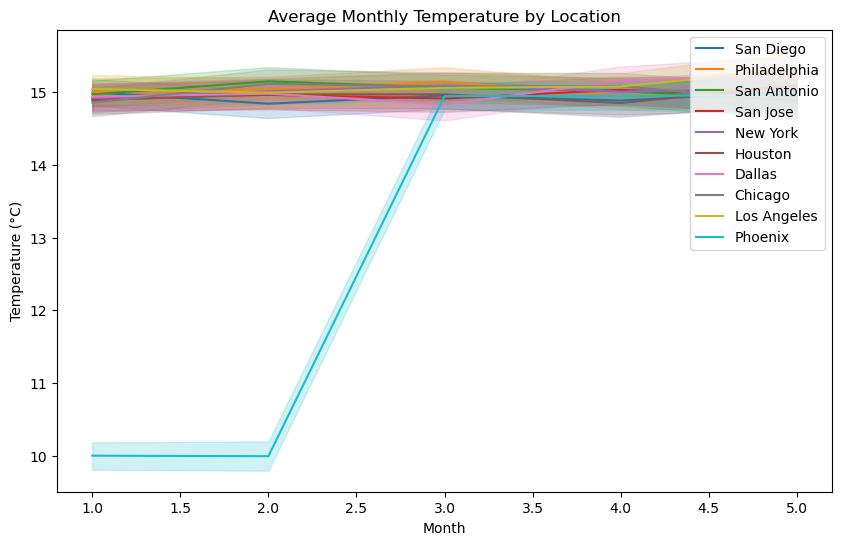

In [46]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Temperature_C', hue='Location', estimator='mean')
plt.title('Average Monthly Temperature by Location')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend(loc='upper right')
plt.show()

# Temperature Over Time in New York

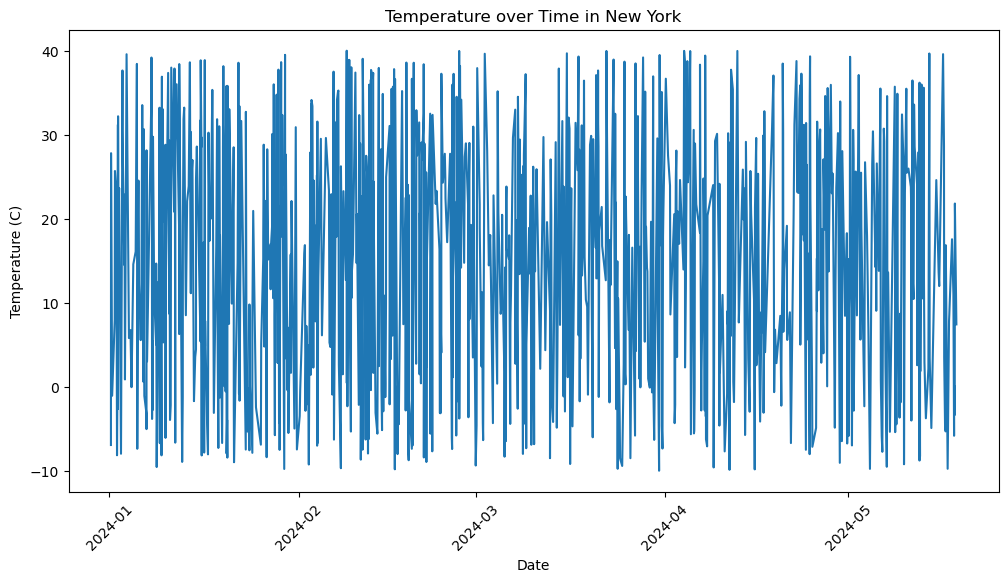

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date_Time', y='Temperature_C', data=df[df['Location'] == 'New York'][:1000])
plt.title('Temperature over Time in New York')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.xticks(rotation=45)
plt.show()

# Focus on precipitation data (replace with chosen feature for EDA)

In [13]:
precipitation_df = df[["Location", "Precipitation_mm"]]

# Calculate summary statistics to understand data distribution
print(precipitation_df.describe(include="all"))  # Include categorical data

       Location  Precipitation_mm
count   1000000    1000000.000000
unique       10               NaN
top     Phoenix               NaN
freq     100209               NaN
mean        NaN          5.109639
std         NaN          2.947997
min         NaN          0.000009
25%         NaN          2.580694
50%         NaN          5.109917
75%         NaN          7.613750
max         NaN         14.971583


# Analyzing Precipitation Patterns: Seasonal variations in New York

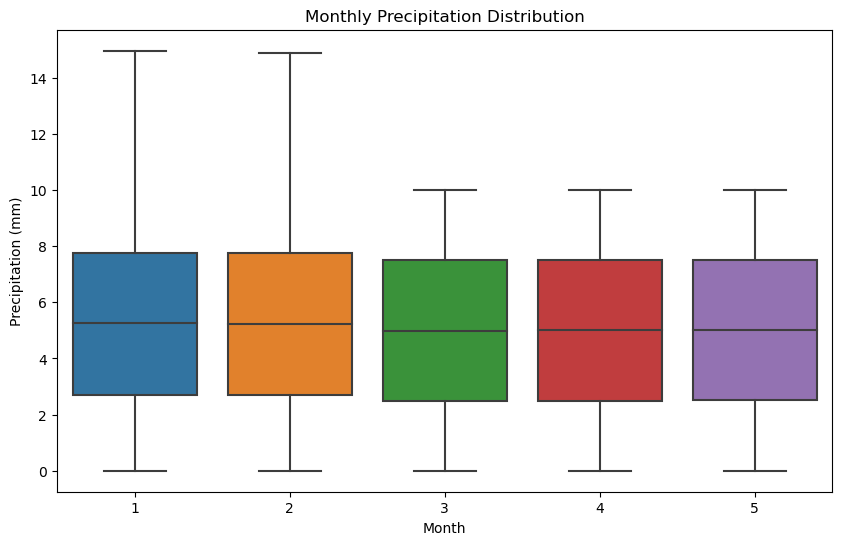

In [25]:
ny_data = df[df['Location'] == 'New York']
ny_data['Month'] = ny_data['Date_Time'].dt.month

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Month', y='Precipitation_mm')
plt.title('Monthly Precipitation Distribution')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7200\2896359611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_data['Month'] = ny_data['Date_Time'].dt.month


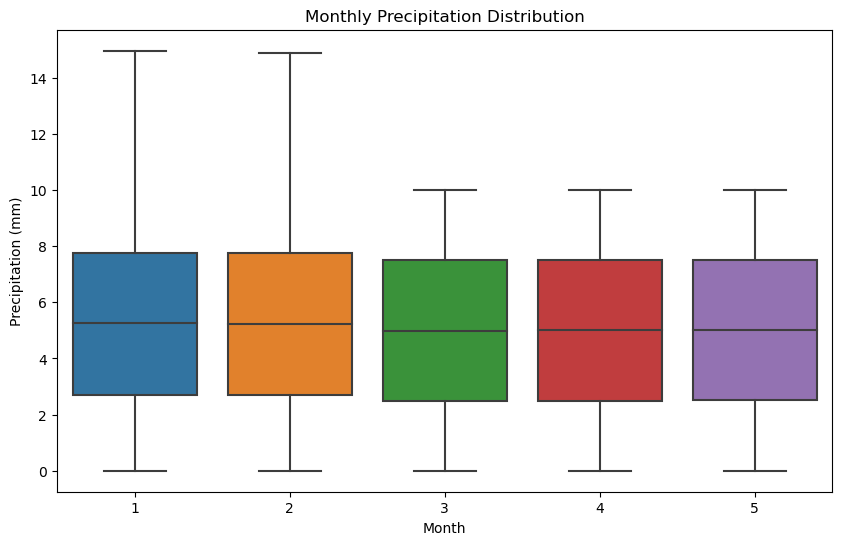

In [31]:
ny_data = df[df['Location'] == 'New York']
ny_data['Month'] = ny_data['Date_Time'].dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Temperature_C', data=ny_data)
plt.title('Monthly Precipitation Distribution')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.show()

# Analyzing average humidity and precipitation in Phoenix

C:\Users\HP\AppData\Local\Temp\ipykernel_7200\1672107211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phx_data['Month'] = phx_data['Date_Time'].dt.month


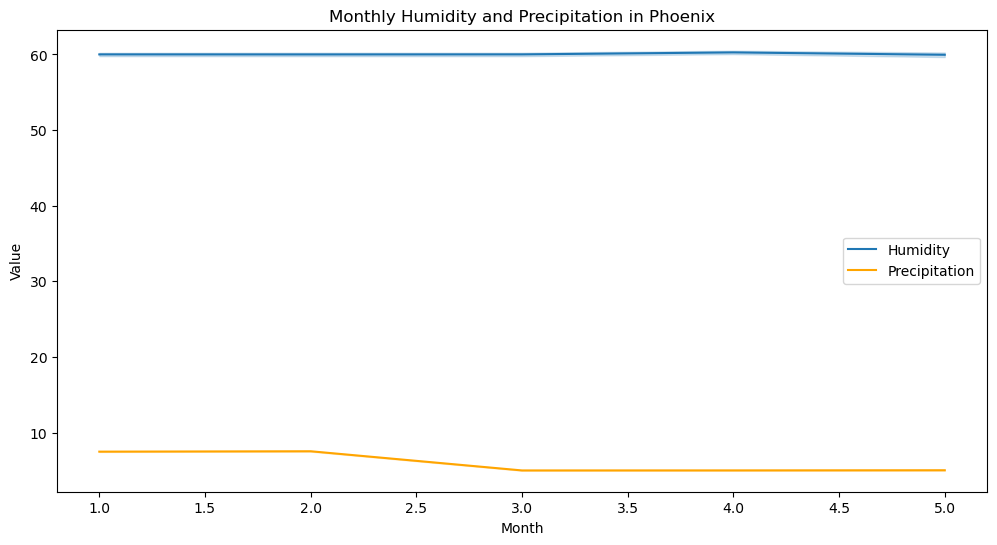

In [33]:
phx_data = df[df['Location'] == 'Phoenix']
phx_data['Month'] = phx_data['Date_Time'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Humidity_pct', data=phx_data, label='Humidity')
sns.lineplot(x='Month', y='Precipitation_mm', data=phx_data, label='Precipitation', color='orange')
plt.title('Monthly Humidity and Precipitation in Phoenix')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()

# Use Case 3: Correlation Analysis


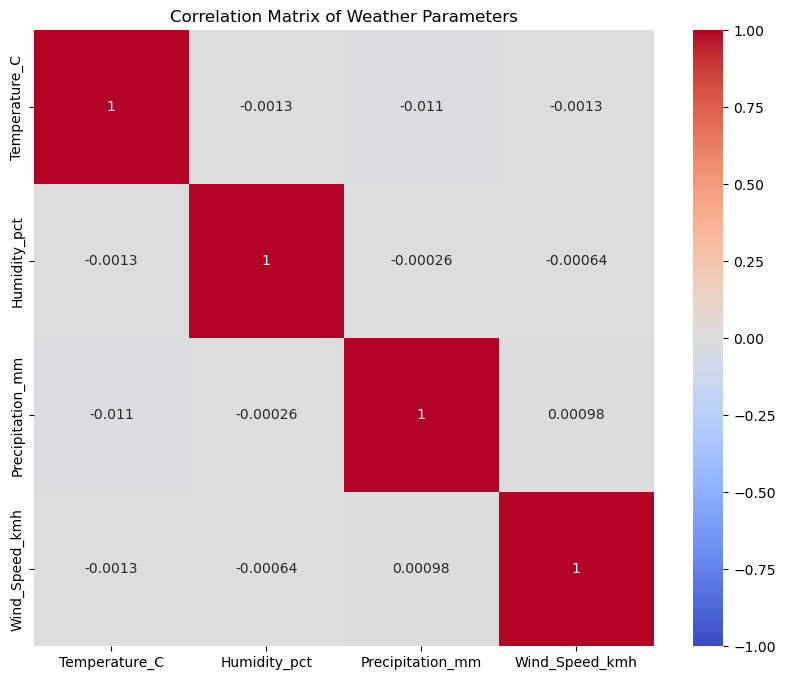

In [36]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Weather Parameters')
plt.show()

# Wind Speed Distribution

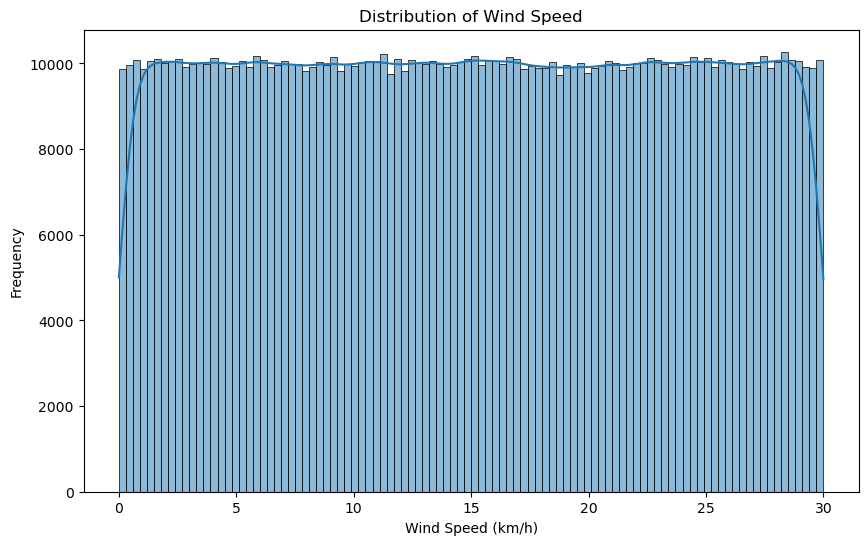

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Wind_Speed_kmh'], kde=True)
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

